# Data Preparation

Creating vectors that represent the entity.

You should do something more in here.

In [1]:
# pylint: skip-file
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
test_df = pd.read_csv('./data/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
submission_df = pd.read_csv('./data/gender_submission.csv')
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
from preprocess import get_X, get_y

X_trn = get_X(train_df,["Pclass", "Sex", "SibSp", "Parch"])
y_trn = get_y(train_df)

X_tst = get_X(test_df)

X_trn.shape, y_trn.shape, X_tst.shape

((891, 5), (891,), (418, 5))

# Models

## Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

In [6]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2023)
scores = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.168230,0.032883,0.782123,0.714286,0.724638,0.719424
1,0.154480,0.017082,0.803371,0.761905,0.705882,0.732824
2,0.158768,0.016972,0.803371,0.761905,0.705882,0.732824
3,0.151932,0.017020,0.797753,0.833333,0.588235,0.689655
4,0.153278,0.016902,0.820225,0.824561,0.681159,0.746032
mean,0.157338,0.020172,0.801368,0.779198,0.681159,0.724152
std,0.006606,0.007106,0.013666,0.049498,0.054193,0.021457


In [7]:
# Change `max_depth`
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2023)
scores = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.147321,0.017165,0.810056,0.786885,0.695652,0.738462
1,0.167323,0.017400,0.808989,0.774194,0.705882,0.738462
2,0.152912,0.016621,0.808989,0.783333,0.691176,0.734375
3,0.149417,0.016712,0.797753,0.833333,0.588235,0.689655
4,0.146755,0.016780,0.808989,0.807018,0.666667,0.730159
mean,0.152745,0.016936,0.806955,0.796953,0.669523,0.726222
std,0.008499,0.000332,0.005165,0.023610,0.047669,0.020729


* RandomForestClassifier Test

In [8]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2023)
clf.fit(X_trn, y_trn)
# predict data가 test set이 되므로 예측값을 구하기 위한 데이터도 null처리 해야 함
pred = clf.predict(X_tst)
pred.shape

(418,)

In [9]:
# submission_df에 'Survived'라는 새로운 열을 추가하고, 이 열에 예측된 값을 담은 변수 pred를 할당
# 'Survived' 열에는 각 행에 대한 생존 여부 예측이 들어감
submission_df['Survived'] = pred
# 행 인덱스를 나타내는 첫번째 열(0,1,2,...,등)을 삭제하여 행 인덱스 없이 저장하도록 함
# 파일의 간결성 및 파일 크기 줄여주는 장점
submission_df.to_csv('./submission_rfc.csv', index=False)

## Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=2023)
scores = cross_validate(reg, X_trn, y_trn, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])]) # NaN

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.150802,0.015714,NaN,NaN,NaN,NaN
1,0.176224,0.009213,NaN,NaN,NaN,NaN
2,0.151289,0.009084,NaN,NaN,NaN,NaN
3,0.132355,0.009006,NaN,NaN,NaN,NaN
4,0.126863,0.008956,NaN,NaN,NaN,NaN
mean,0.147507,0.010394,NaN,NaN,NaN,NaN
std,0.019401,0.002975,NaN,NaN,NaN,NaN


In [12]:
from rf import CustomRF

In [13]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
reg = CustomRF(n_estimators=200, max_depth=50, random_state=2023, threshold=0.5)
scores = cross_validate(reg, X_trn, y_trn, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.291051,0.020116,0.765363,0.634921,0.677966,0.655738
1,0.263982,0.020182,0.769663,0.806452,0.632911,0.709220
2,0.262436,0.019973,0.786517,0.754098,0.666667,0.707692
3,0.261058,0.020169,0.747191,0.745455,0.569444,0.645669
4,0.259037,0.020695,0.825843,0.833333,0.634921,0.720721
mean,0.267513,0.020227,0.778915,0.754852,0.636382,0.687808
std,0.013283,0.000274,0.029731,0.076312,0.042253,0.034428


* RandomForestRegressor Test

In [14]:
reg = CustomRF(n_estimators=200, max_depth=50, random_state=2023)
reg.fit(X_trn, y_trn)
pred = reg.predict(X_tst)

submission_df['Survived'] = pred
submission_df.to_csv('./submission_rfr.csv', index=False)

## Neuarl Network

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'cpu'

In [16]:
from nn import ANN
from utils import CustomDataset
from train import train_one_epoch, evaluate
from torchmetrics.classification import BinaryConfusionMatrix, BinaryAccuracy

In [17]:
from sklearn.model_selection import StratifiedKFold
from tqdm.auto import tqdm
from torch.utils.data import TensorDataset


n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2023)

nets = [ANN().to(device) for i in range(n_splits)]
history = []

for i, (trn_idx, val_idx) in enumerate(skf.split(X_trn, y_trn)):
  X, y = torch.tensor(X_trn[trn_idx]), torch.tensor(y_trn[trn_idx]).unsqueeze(-1)
  X_val, y_val = torch.tensor(X_trn[val_idx]), torch.tensor(y_trn[val_idx]).unsqueeze(-1)

  # ds = TensorDataset(X, y)
  # ds_val = TensorDataset(X_val, y_val)
  ds = CustomDataset(X, y)
  ds_val = CustomDataset(X_val, y_val)
  dl = DataLoader(ds, batch_size=32, shuffle=True)
  dl_val = DataLoader(ds_val, batch_size=len(ds_val), shuffle=False)

  net = nets[i]
  optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

  pbar = tqdm(range(300))
  for j in pbar:
    accuracy = BinaryAccuracy().to(device)
    loss = train_one_epoch(net, nn.functional.binary_cross_entropy, optimizer, dl, device)
    loss_val = evaluate(net, nn.functional.binary_cross_entropy, dl_val, device, accuracy)
    acc_val = accuracy.compute().item()
    pbar.set_postfix(trn_loss=loss, val_loss=loss_val, val_acc=acc_val)

  bcm = BinaryConfusionMatrix().to(device)
  evaluate(net, nn.functional.binary_cross_entropy, dl_val, device, bcm)
  history.append(bcm)

100%|██████████| 300/300 [00:13<00:00, 22.74it/s, trn_loss=0.453, val_acc=0.73, val_loss=0.543] 


,accuracy,precision,recall,f1
0,0.804469,0.750000,0.739130,0.744526
1,0.820225,0.860000,0.632353,0.728814
2,0.837079,0.819672,0.735294,0.775194
3,0.803371,0.770492,0.691176,0.728682
4,0.730337,0.684211,0.565217,0.619048
mean,0.799096,0.776875,0.672634,0.719253
std,0.040817,0.067252,0.073913,0.059139


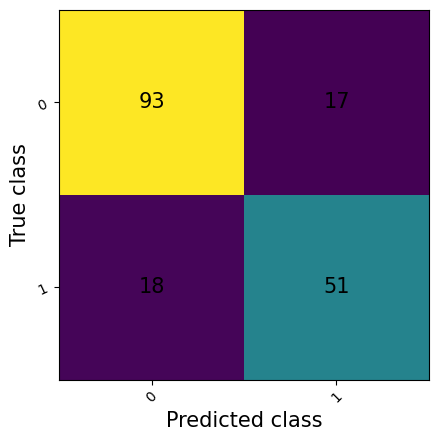

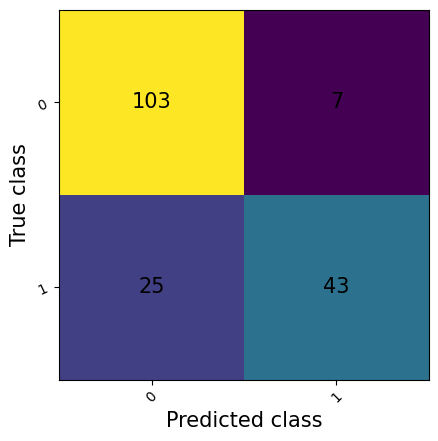

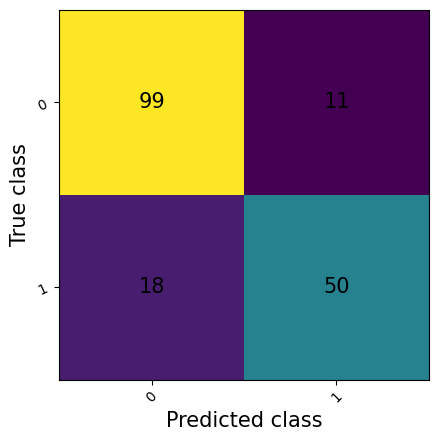

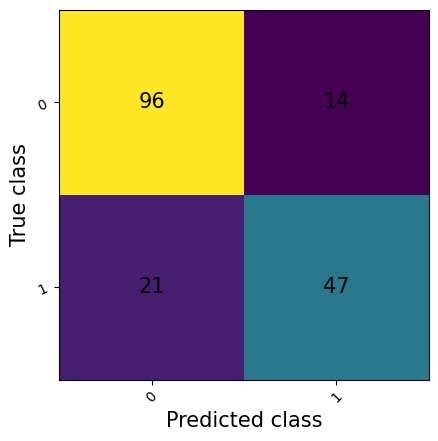

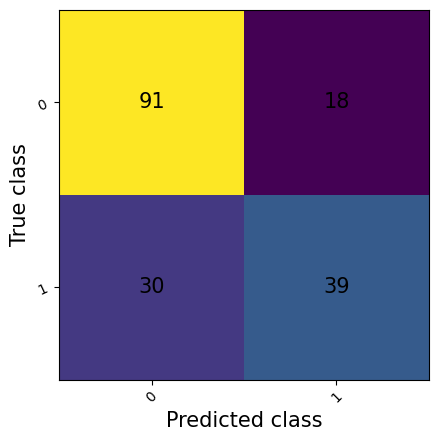

In [18]:
from metric import cm_to_metrics

scores = {
  'accuracy': [],
  'precision': [],
  'recall': [],
  'f1': []
}

for bcm in history:
  bcm.plot()
  cm = bcm.compute().cpu().numpy()

  accuracy, precision, recall, f1 = cm_to_metrics(cm)

  scores['accuracy'].append(accuracy)
  scores['precision'].append(precision)
  scores['recall'].append(recall)
  scores['f1'].append(f1)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

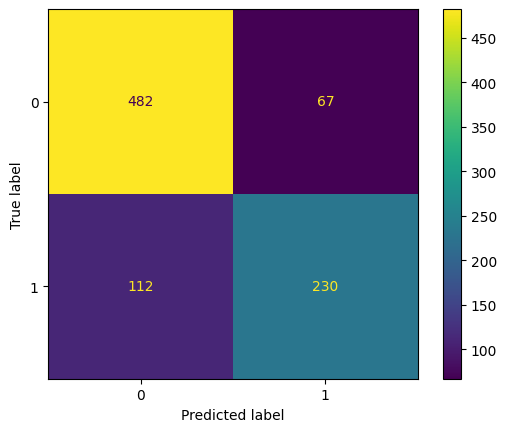

,accuracy,precision,recall,f1
0,0.799102,0.774411,0.672515,0.719875


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = sum([bcm.compute().cpu().numpy() for bcm in history])
ConfusionMatrixDisplay(cm).plot()
plt.show()

accuracy, precision, recall, f1 = cm_to_metrics(cm)

pd.DataFrame({'accuracy': [accuracy], 'precision': [precision], 'recall': [recall], 'f1': [f1]})

* Neural Net Test

In [20]:
X, y = torch.tensor(X_trn), torch.tensor(y_trn).unsqueeze(-1)

ds = TensorDataset(X, y)
# ds = CustomDataset(X, y)
dl = DataLoader(ds, batch_size=32, shuffle=True)

net = ANN().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

pbar = tqdm(range(300))
for j in pbar:
  loss = train_one_epoch(net, nn.functional.binary_cross_entropy, optimizer, dl, device)
  pbar.set_postfix(trn_loss=loss)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:16<00:00, 18.19it/s, trn_loss=0.466]


In [21]:
pred = net(torch.tensor(X_tst, device=device)).cpu()
pred = (pred > 0.5).float().flatten()

submission_df['Survived'] = pred
submission_df.to_csv('./submission_nn.csv', index=False)